# Decision Tree Implementation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\my pc\Desktop\Machine Learning Projects\Dataset\df_EDA.csv")
df

,Unnamed: 0,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Airlines,OriginCityName,DestCityName,DepDelay,ArrDelay,AirTime,Distance,Month_Str,DayOfWeek_Str,Flight_Status
0,1,1,1,6,4,2022-01-06,Delta Airlines,"Atlanta, GA","Fort Lauderdale, FL",-4.0,-1.0,93.0,581.0,Jan,Thu,0
1,2,1,1,6,4,2022-01-06,Delta Airlines,"Fort Lauderdale, FL","Atlanta, GA",-2.0,-12.0,83.0,581.0,Jan,Thu,0
2,3,1,1,6,4,2022-01-06,Delta Airlines,"Fort Lauderdale, FL","Raleigh/Durham, NC",-5.0,-15.0,93.0,680.0,Jan,Thu,0
3,4,1,1,6,4,2022-01-06,Delta Airlines,"Atlanta, GA","Jackson/Vicksburg, MS",-4.0,-11.0,60.0,341.0,Jan,Thu,0
4,5,1,1,6,4,2022-01-06,Delta Airlines,"Jackson/Vicksburg, MS","Atlanta, GA",-7.0,-23.0,49.0,341.0,Jan,Thu,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6804001,7013503,4,12,27,2,2022-12-27,Spirit Airlines,"Kansas City, MO","Los Angeles, CA",50.0,37.0,182.0,1363.0,Dec,Tue,1
6804002,7013504,4,12,28,3,2022-12-28,Spirit Airlines,"Kansas City, MO","Los Angeles, CA",-7.0,-24.0,191.0,1363.0,Dec,Wed,0
6804003,7013505,4,12,29,4,2022-12-29,Spirit Airlines,"Kansas City, MO","Los Angeles, CA",11.0,22.0,210.0,1363.0,Dec,Thu,1
6804004,7013506,4,12,30,5,2022-12-30,Spirit Airlines,"Kansas City, MO","Los Angeles, CA",-5.0,-21.0,187.0,1363.0,Dec,Fri,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6804006 entries, 0 to 6804005
Data columns (total 16 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Unnamed: 0      int64  
 1   Quarter         int64  
 2   Month           int64  
 3   DayofMonth      int64  
 4   DayOfWeek       int64  
 5   FlightDate      object 
 6   Airlines        object 
 7   OriginCityName  object 
 8   DestCityName    object 
 9   DepDelay        float64
 10  ArrDelay        float64
 11  AirTime         float64
 12  Distance        float64
 13  Month_Str       object 
 14  DayOfWeek_Str   object 
 15  Flight_Status   int64  
dtypes: float64(4), int64(6), object(6)
memory usage: 830.6+ MB


In [4]:
df.drop("Unnamed: 0",axis=1,inplace=True)
df

,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Airlines,OriginCityName,DestCityName,DepDelay,ArrDelay,AirTime,Distance,Month_Str,DayOfWeek_Str,Flight_Status
0,1,1,6,4,2022-01-06,Delta Airlines,"Atlanta, GA","Fort Lauderdale, FL",-4.0,-1.0,93.0,581.0,Jan,Thu,0
1,1,1,6,4,2022-01-06,Delta Airlines,"Fort Lauderdale, FL","Atlanta, GA",-2.0,-12.0,83.0,581.0,Jan,Thu,0
2,1,1,6,4,2022-01-06,Delta Airlines,"Fort Lauderdale, FL","Raleigh/Durham, NC",-5.0,-15.0,93.0,680.0,Jan,Thu,0
3,1,1,6,4,2022-01-06,Delta Airlines,"Atlanta, GA","Jackson/Vicksburg, MS",-4.0,-11.0,60.0,341.0,Jan,Thu,0
4,1,1,6,4,2022-01-06,Delta Airlines,"Jackson/Vicksburg, MS","Atlanta, GA",-7.0,-23.0,49.0,341.0,Jan,Thu,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6804001,4,12,27,2,2022-12-27,Spirit Airlines,"Kansas City, MO","Los Angeles, CA",50.0,37.0,182.0,1363.0,Dec,Tue,1
6804002,4,12,28,3,2022-12-28,Spirit Airlines,"Kansas City, MO","Los Angeles, CA",-7.0,-24.0,191.0,1363.0,Dec,Wed,0
6804003,4,12,29,4,2022-12-29,Spirit Airlines,"Kansas City, MO","Los Angeles, CA",11.0,22.0,210.0,1363.0,Dec,Thu,1
6804004,4,12,30,5,2022-12-30,Spirit Airlines,"Kansas City, MO","Los Angeles, CA",-5.0,-21.0,187.0,1363.0,Dec,Fri,0


# Data Preprocessing

In [5]:
df.columns

Index(['Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate', 'Airlines',
       'OriginCityName', 'DestCityName', 'DepDelay', 'ArrDelay', 'AirTime',
       'Distance', 'Month_Str', 'DayOfWeek_Str', 'Flight_Status'],
      dtype='object')

In [6]:
df.Airlines.unique()

array(['Delta Airlines', 'Frontier Airlines', 'Allegiant Air',
       'Hawaiian Airlines', 'American Airlines', 'Spirit Airlines',
       'Alaska Airlines', 'Southwest Airlines', 'United Airlines',
       'JetBlue Airways'], dtype=object)

In [7]:
df.DestCityName.unique()

array(['Fort Lauderdale, FL', 'Atlanta, GA', 'Raleigh/Durham, NC',
       'Jackson/Vicksburg, MS', 'Fort Myers, FL', 'Indianapolis, IN',
       'Denver, CO', 'Savannah, GA', 'Detroit, MI', 'Boston, MA',
       'Long Beach, CA', 'Las Vegas, NV', 'Charlotte, NC', 'Newark, NJ',
       'Minneapolis, MN', 'Cincinnati, OH', 'Syracuse, NY',
       'Washington, DC', 'Norfolk, VA', 'New York, NY', 'Orlando, FL',
       'Salt Lake City, UT', 'Los Angeles, CA', 'Memphis, TN',
       'Portland, OR', 'Baltimore, MD', 'Chicago, IL', 'San Juan, PR',
       'Rochester, NY', 'Louisville, KY', 'Dallas/Fort Worth, TX',
       'Huntsville, AL', 'Jacksonville, FL', 'Miami, FL', 'Seattle, WA',
       'Pittsburgh, PA', 'Wichita, KS', 'Houston, TX', 'Austin, TX',
       'Santa Ana, CA', 'Pensacola, FL', 'Boise, ID', 'New Orleans, LA',
       'Tulsa, OK', 'Providence, RI', 'Fargo, ND', 'Grand Rapids, MI',
       'Nashville, TN', 'San Jose, CA', 'Madison, WI', 'Charleston, SC',
       'Christiansted, VI', 'Oakl

In [8]:
df.DestCityName.value_counts().iloc[:30]

Chicago, IL              360585
Atlanta, GA              311987
New York, NY             292433
Denver, CO               270416
Dallas/Fort Worth, TX    267438
Washington, DC           212860
Charlotte, NC            208900
Houston, TX              195933
Los Angeles, CA          187969
Las Vegas, NV            171281
Seattle, WA              169857
Phoenix, AZ              167381
Orlando, FL              140838
Newark, NJ               139372
Boston, MA               133168
San Francisco, CA        127631
Detroit, MI              124692
Minneapolis, MN          117592
Salt Lake City, UT       108401
Miami, FL                103414
Philadelphia, PA         100817
Austin, TX                86888
Nashville, TN             85069
San Diego, CA             84116
Baltimore, MD             83207
Fort Lauderdale, FL       81491
Tampa, FL                 70348
Dallas, TX                63553
St. Louis, MO             60248
Portland, OR              58086
Name: DestCityName, dtype: int64

In [9]:
top_cities=df.DestCityName.value_counts().iloc[:30].rename_axis('DestCityName').reset_index(name='Total_Flights')
top_cities.head(10)

,DestCityName,Total_Flights
0,"Chicago, IL",360585
1,"Atlanta, GA",311987
2,"New York, NY",292433
3,"Denver, CO",270416
4,"Dallas/Fort Worth, TX",267438
5,"Washington, DC",212860
6,"Charlotte, NC",208900
7,"Houston, TX",195933
8,"Los Angeles, CA",187969
9,"Las Vegas, NV",171281


In [10]:
top_cities.DestCityName.unique()

array(['Chicago, IL', 'Atlanta, GA', 'New York, NY', 'Denver, CO',
       'Dallas/Fort Worth, TX', 'Washington, DC', 'Charlotte, NC',
       'Houston, TX', 'Los Angeles, CA', 'Las Vegas, NV', 'Seattle, WA',
       'Phoenix, AZ', 'Orlando, FL', 'Newark, NJ', 'Boston, MA',
       'San Francisco, CA', 'Detroit, MI', 'Minneapolis, MN',
       'Salt Lake City, UT', 'Miami, FL', 'Philadelphia, PA',
       'Austin, TX', 'Nashville, TN', 'San Diego, CA', 'Baltimore, MD',
       'Fort Lauderdale, FL', 'Tampa, FL', 'Dallas, TX', 'St. Louis, MO',
       'Portland, OR'], dtype=object)

In [11]:
list_city=top_cities['DestCityName'].to_list()

In [12]:
list_city

['Chicago, IL',
 'Atlanta, GA',
 'New York, NY',
 'Denver, CO',
 'Dallas/Fort Worth, TX',
 'Washington, DC',
 'Charlotte, NC',
 'Houston, TX',
 'Los Angeles, CA',
 'Las Vegas, NV',
 'Seattle, WA',
 'Phoenix, AZ',
 'Orlando, FL',
 'Newark, NJ',
 'Boston, MA',
 'San Francisco, CA',
 'Detroit, MI',
 'Minneapolis, MN',
 'Salt Lake City, UT',
 'Miami, FL',
 'Philadelphia, PA',
 'Austin, TX',
 'Nashville, TN',
 'San Diego, CA',
 'Baltimore, MD',
 'Fort Lauderdale, FL',
 'Tampa, FL',
 'Dallas, TX',
 'St. Louis, MO',
 'Portland, OR']

In [13]:
x=df.DestCityName.isin(list_city)
df_new=df[x]
df_new.head()

,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Airlines,OriginCityName,DestCityName,DepDelay,ArrDelay,AirTime,Distance,Month_Str,DayOfWeek_Str,Flight_Status
0,1,1,6,4,2022-01-06,Delta Airlines,"Atlanta, GA","Fort Lauderdale, FL",-4.0,-1.0,93.0,581.0,Jan,Thu,0
1,1,1,6,4,2022-01-06,Delta Airlines,"Fort Lauderdale, FL","Atlanta, GA",-2.0,-12.0,83.0,581.0,Jan,Thu,0
4,1,1,6,4,2022-01-06,Delta Airlines,"Jackson/Vicksburg, MS","Atlanta, GA",-7.0,-23.0,49.0,341.0,Jan,Thu,0
5,1,1,6,4,2022-01-06,Delta Airlines,"Richmond, VA","Atlanta, GA",-3.0,-12.0,80.0,481.0,Jan,Thu,0
8,1,1,6,4,2022-01-06,Delta Airlines,"Raleigh/Durham, NC","Atlanta, GA",-3.0,-11.0,67.0,356.0,Jan,Thu,0


In [14]:
df_new.DestCityName.value_counts()

Chicago, IL              360585
Atlanta, GA              311987
New York, NY             292433
Denver, CO               270416
Dallas/Fort Worth, TX    267438
Washington, DC           212860
Charlotte, NC            208900
Houston, TX              195933
Los Angeles, CA          187969
Las Vegas, NV            171281
Seattle, WA              169857
Phoenix, AZ              167381
Orlando, FL              140838
Newark, NJ               139372
Boston, MA               133168
San Francisco, CA        127631
Detroit, MI              124692
Minneapolis, MN          117592
Salt Lake City, UT       108401
Miami, FL                103414
Philadelphia, PA         100817
Austin, TX                86888
Nashville, TN             85069
San Diego, CA             84116
Baltimore, MD             83207
Fort Lauderdale, FL       81491
Tampa, FL                 70348
Dallas, TX                63553
St. Louis, MO             60248
Portland, OR              58086
Name: DestCityName, dtype: int64

In [15]:
df.shape

(6804006, 15)

In [16]:
df_new.shape

(4585971, 15)

In [17]:
df_new.columns

Index(['Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate', 'Airlines',
       'OriginCityName', 'DestCityName', 'DepDelay', 'ArrDelay', 'AirTime',
       'Distance', 'Month_Str', 'DayOfWeek_Str', 'Flight_Status'],
      dtype='object')

In [18]:
df_new=df_new.drop(['Quarter','FlightDate','Month_Str','DayOfWeek_Str'],axis=1)

In [19]:
df_new.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'Airlines', 'OriginCityName',
       'DestCityName', 'DepDelay', 'ArrDelay', 'AirTime', 'Distance',
       'Flight_Status'],
      dtype='object')

<AxesSubplot:xlabel='Flight_Status', ylabel='count'>

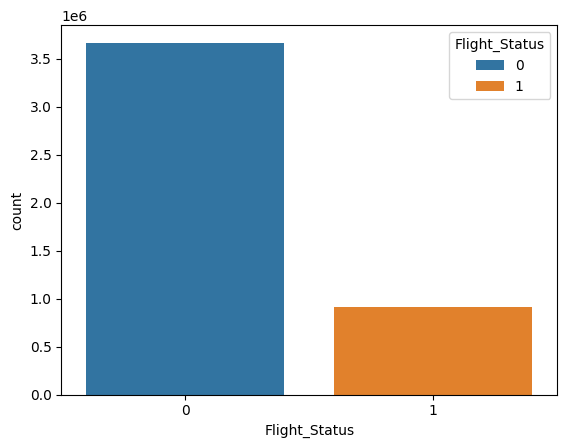

In [20]:
sns.countplot(x='Flight_Status',data=df_new,hue='Flight_Status')

In [21]:
df_new['Flight_Status'].value_counts()

0    3669005
1     916966
Name: Flight_Status, dtype: int64

In [22]:
df_new['Flight_Status'].value_counts(normalize=True)

0    0.80005
1    0.19995
Name: Flight_Status, dtype: float64

In [23]:
Airlines_dummies = pd.get_dummies(df_new['Airlines'], prefix='Airlines', drop_first=True)
DestCityName_dummies = pd.get_dummies(df_new['DestCityName'], prefix='DestCityName', drop_first=True)
Month_dummines = pd.get_dummies(df_new['Month'], prefix='Month', drop_first=True) 
DayOfWeek_dummies = pd.get_dummies(df_new['DayOfWeek'], prefix='DayOfWeek', drop_first=True)

In [24]:
df_new = df_new.drop(['Airlines', 'OriginCityName', 'DestCityName', 'Month', 'DayofMonth', 'DayOfWeek', 'ArrDelay'], axis=1)
df_new

,DepDelay,AirTime,Distance,Flight_Status
0,-4.0,93.0,581.0,0
1,-2.0,83.0,581.0,0
4,-7.0,49.0,341.0,0
5,-3.0,80.0,481.0,0
8,-3.0,67.0,356.0,0
...,...,...,...,...
6804001,50.0,182.0,1363.0,1
6804002,-7.0,191.0,1363.0,0
6804003,11.0,210.0,1363.0,1
6804004,-5.0,187.0,1363.0,0


In [26]:
df_new = pd.concat([df_new, Airlines_dummies, DestCityName_dummies, Month_dummines, DayOfWeek_dummies], axis=1)

In [27]:
df_new

,DepDelay,AirTime,Distance,Flight_Status,Airlines_Allegiant Air,Airlines_American Airlines,Airlines_Delta Airlines,Airlines_Frontier Airlines,Airlines_Hawaiian Airlines,Airlines_JetBlue Airways,...,Month_9,Month_10,Month_11,Month_12,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7
0,-4.0,93.0,581.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,-2.0,83.0,581.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,-7.0,49.0,341.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,-3.0,80.0,481.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,-3.0,67.0,356.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6804001,50.0,182.0,1363.0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
6804002,-7.0,191.0,1363.0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
6804003,11.0,210.0,1363.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
6804004,-5.0,187.0,1363.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [30]:
df_new.columns

Index(['DepDelay', 'AirTime', 'Distance', 'Flight_Status',
       'Airlines_Allegiant Air', 'Airlines_American Airlines',
       'Airlines_Delta Airlines', 'Airlines_Frontier Airlines',
       'Airlines_Hawaiian Airlines', 'Airlines_JetBlue Airways',
       'Airlines_Southwest Airlines', 'Airlines_Spirit Airlines',
       'Airlines_United Airlines', 'DestCityName_Austin, TX',
       'DestCityName_Baltimore, MD', 'DestCityName_Boston, MA',
       'DestCityName_Charlotte, NC', 'DestCityName_Chicago, IL',
       'DestCityName_Dallas, TX', 'DestCityName_Dallas/Fort Worth, TX',
       'DestCityName_Denver, CO', 'DestCityName_Detroit, MI',
       'DestCityName_Fort Lauderdale, FL', 'DestCityName_Houston, TX',
       'DestCityName_Las Vegas, NV', 'DestCityName_Los Angeles, CA',
       'DestCityName_Miami, FL', 'DestCityName_Minneapolis, MN',
       'DestCityName_Nashville, TN', 'DestCityName_New York, NY',
       'DestCityName_Newark, NJ', 'DestCityName_Orlando, FL',
       'DestCityName_Phil

# Model Building

In [31]:
from sklearn.model_selection import train_test_split

In [33]:
y=df_new['Flight_Status']
X=df_new.drop(['Flight_Status'],axis=1)

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
model=DecisionTreeClassifier(max_depth=5)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [46]:
model_accuracy = model.score(X_test, y_test)
y_pred=model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [47]:
model_accuracy

0.9294871608498959

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [49]:
confusion= confusion_matrix(y_test, y_pred)
confusion

array([[1081006,   19921],
       [  77090,  197775]], dtype=int64)

In [52]:
classification= classification_report(y_test, y_pred)
classification

'              precision    recall  f1-score   support\n\n           0       0.93      0.98      0.96   1100927\n           1       0.91      0.72      0.80    274865\n\n    accuracy                           0.93   1375792\n   macro avg       0.92      0.85      0.88   1375792\nweighted avg       0.93      0.93      0.93   1375792\n'